<a href="https://colab.research.google.com/github/Riswanpk/OIBSIP/blob/main/Task03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 03 : CAR PRICE PREDICTION WITH MACHINE LEARNING

**Step 01 : Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Step 02 : Loading the Dataset**

In [2]:
car_data=pd.read_csv('cardata.csv')
car_data=car_data.drop(columns=['car_ID'])
car_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Step 03 : Reading the Dataset**

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

**Step 04 : Check for Missing Values**

In [4]:
car_data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
car_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
car_data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [7]:
print(car_data['fueltype'].value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64


In [8]:
print(car_data['cylindernumber'].value_counts())
print(car_data['carbody'].value_counts())

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


**Steo 05 : Visualizing the Dataset b/w Price and Other Factors**

In [9]:
fuel_type=car_data['fueltype']
car_body=car_data['carbody']
engine_type=car_data['enginetype']
cylinder_number=car_data['cylindernumber']
car_price=car_data['price']
horsepower=car_data['horsepower']

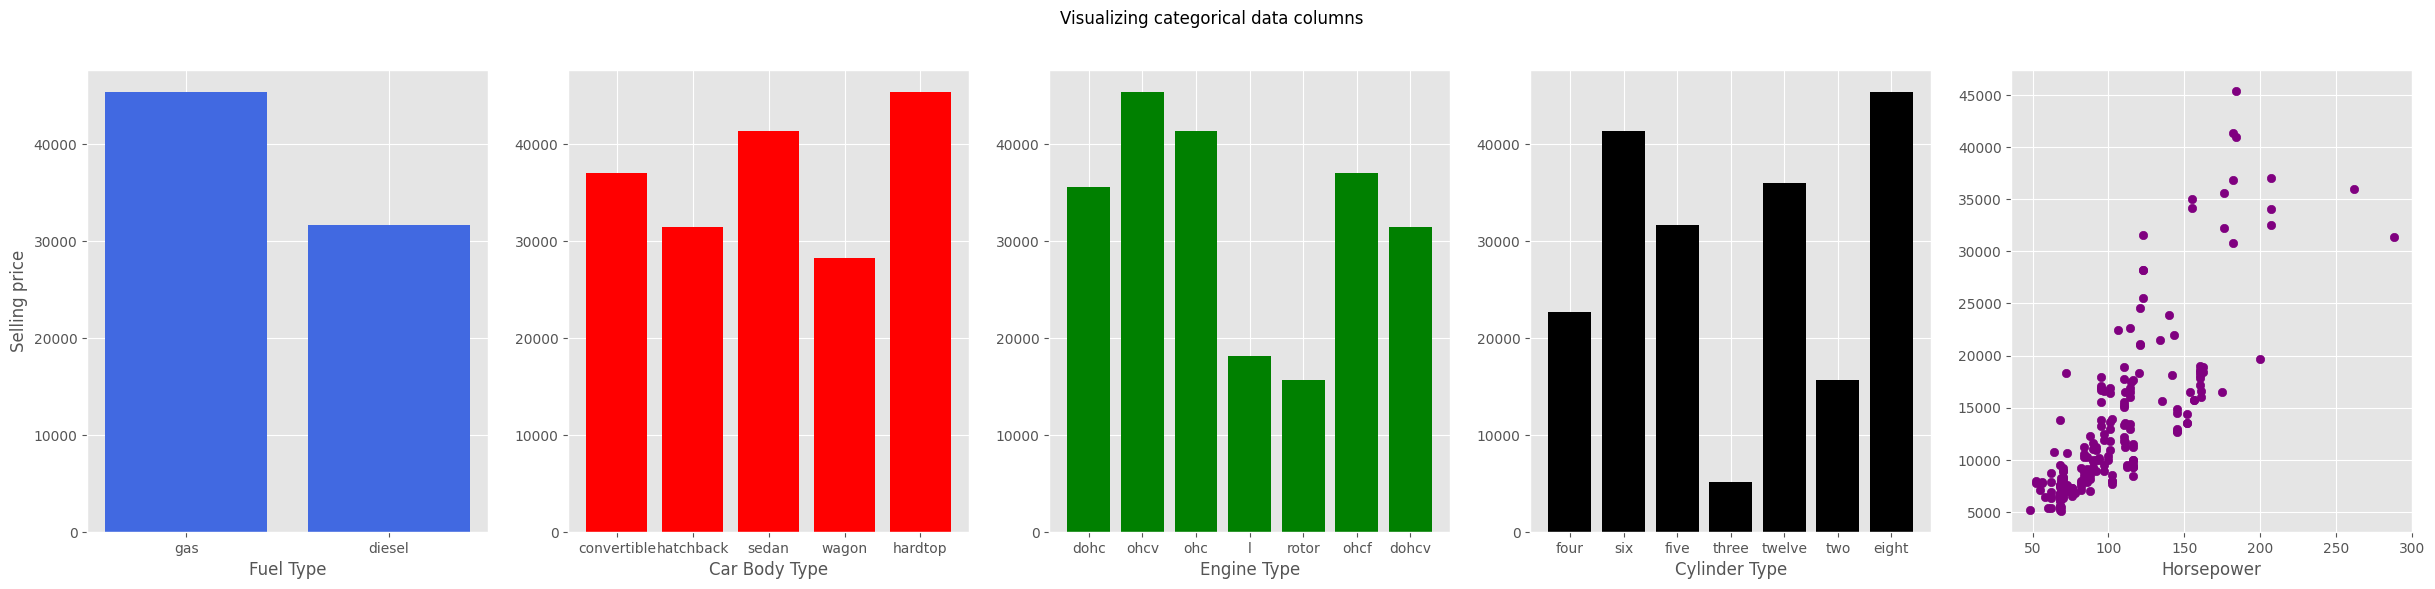

In [10]:
style.use('ggplot')
fig=plt.figure(figsize=(30,6))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,5,1)
plt.bar(fuel_type,car_price,color='royalblue')
plt.xlabel('Fuel Type')
plt.ylabel('Selling price')
plt.subplot(1,5,2)
plt.bar(car_body,car_price,color='red')
plt.xlabel('Car Body Type')
plt.subplot(1,5,3)
plt.bar(engine_type,car_price,color='green')
plt.xlabel('Engine Type')
plt.subplot(1,5,4)
plt.bar(cylinder_number,car_price,color='black')
plt.xlabel('Cylinder Type')
plt.subplot(1,5,5)
plt.scatter(horsepower,car_price,color='purple')
plt.xlabel('Horsepower')
plt.show()

<Axes: xlabel='horsepower', ylabel='price'>

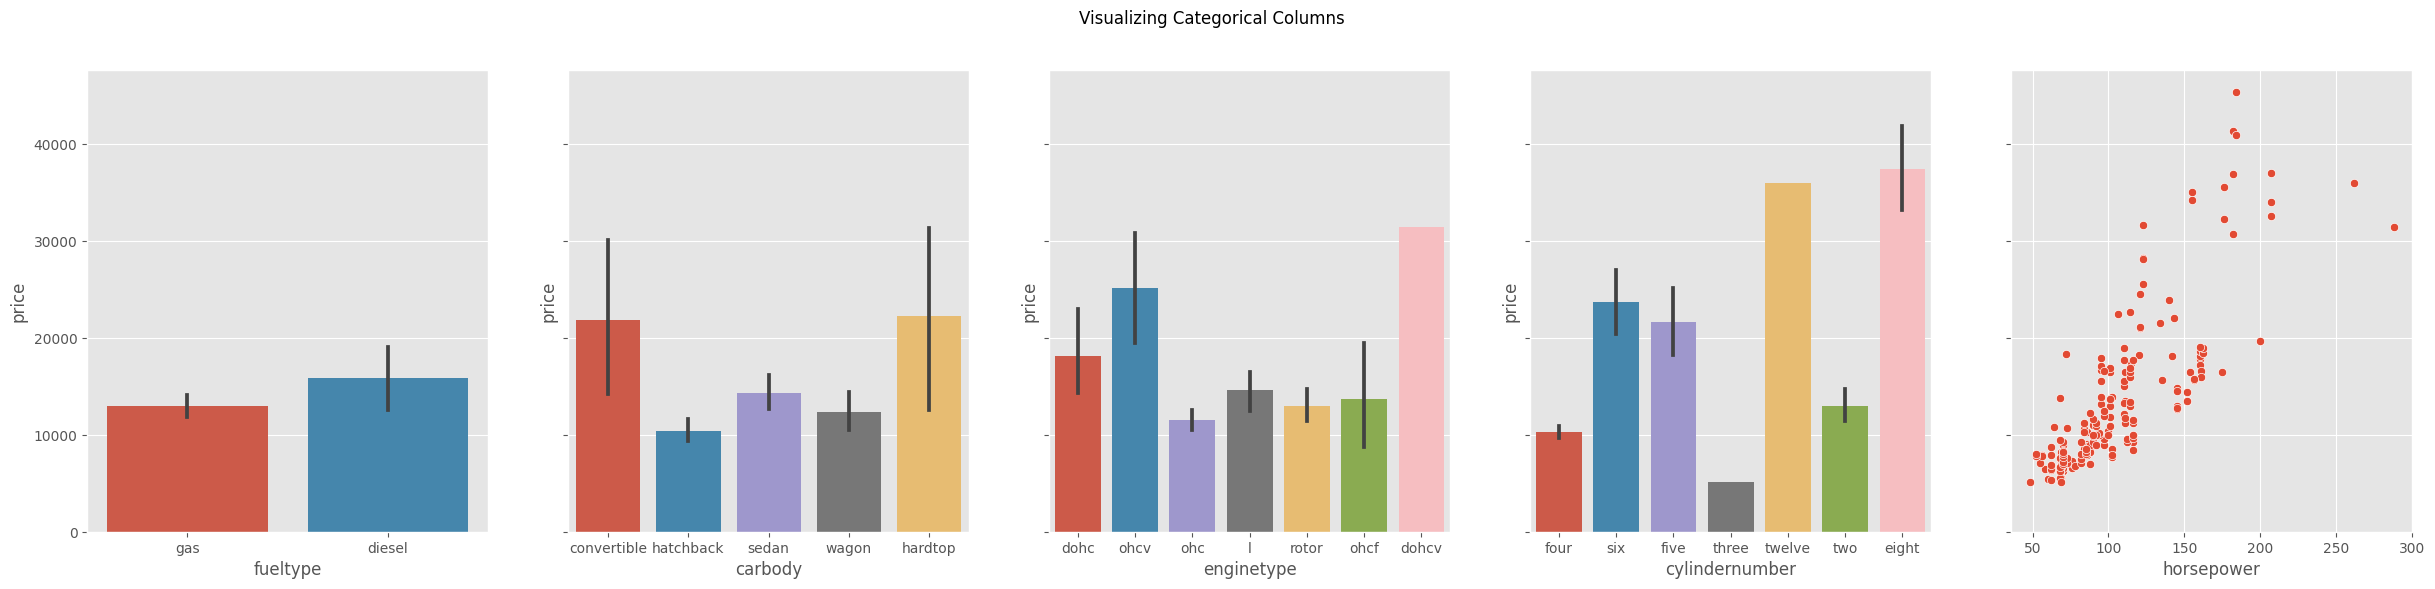

In [11]:
fig,axes=plt.subplots(1,5,figsize=(30,6),sharey=True)
fig.suptitle('Visualizing Categorical Columns')
sns.barplot(x=fuel_type,y=car_price,ax=axes[0])
sns.barplot(x=car_body,y=car_price,ax=axes[1])
sns.barplot(x=engine_type,y=car_price,ax=axes[2])
sns.barplot(x=cylinder_number,y=car_price,ax=axes[3])
sns.scatterplot(x=horsepower,y=car_price,ax=axes[4])

**Step 06 : Visualizing the Correlation b/w features of the Dataset**

<ipython-input-12-f7d36cb61801>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_data.corr(),annot=True)


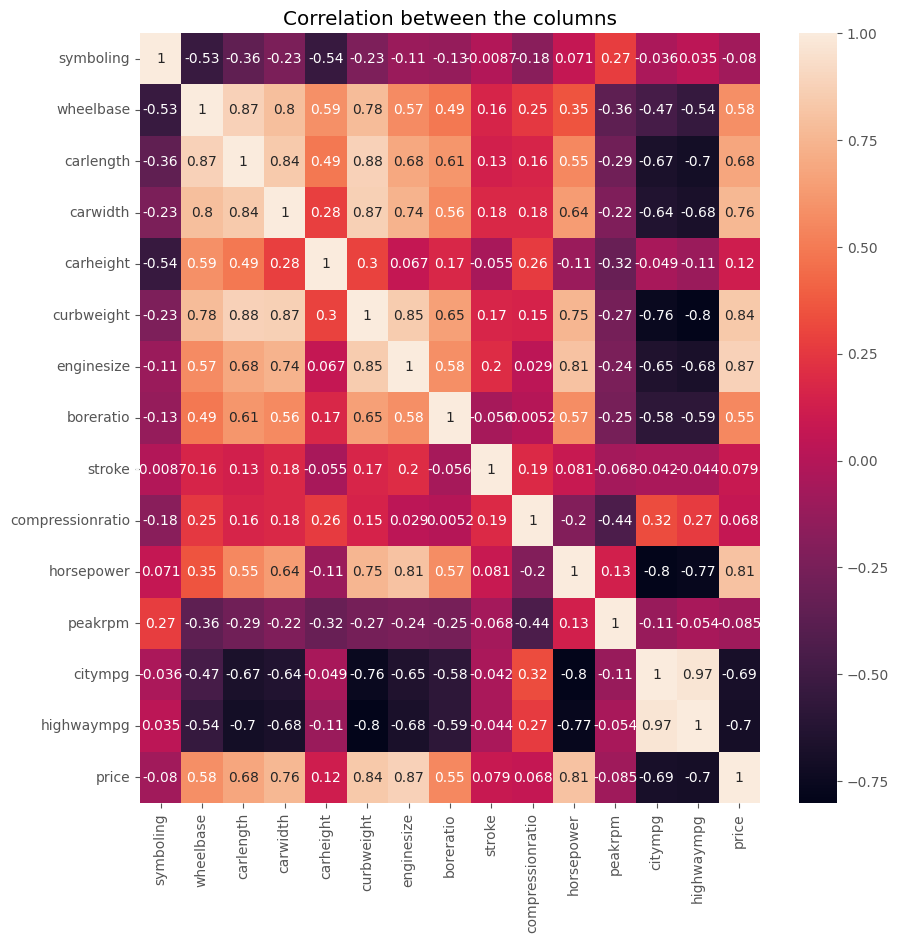

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(car_data.corr(),annot=True)
plt.title('Correlation between the columns')
plt.show()

**Step 07 : Separating Features & Target Variables**

In [13]:
x=car_data.drop(['CarName','price'],axis=1)
y=car_data['price']

**Step 08 : Splitting Dataset into Training & Testing**

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

**Step 09 : Coverting Categorical Variables to Numerical using Label Encoder**

In [15]:
label_encoder=LabelEncoder()
combined=pd.concat([x_train,x_test],axis=0)
combined_encoded=combined.apply(lambda col: label_encoder.fit_transform(col))
x_train=combined_encoded[:len(x_train)]
x_test=combined_encoded[len(x_train):]

**Step 10 : Creating a Linear Regression Model**

In [16]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

**Step 11 : Calculating MAE MSE and R2 Score of the Model**

In [17]:
pred=model.predict(x_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
print("MAE: ",(metrics.mean_absolute_error(pred,y_test)))
print('MSE: ',(metrics.mean_squared_error(pred,y_test)))
print("R2 score: ",(metrics.r2_score(pred,y_test)))

MAE:  2947.94454254195
MSE:  16940829.844558656
R2 score:  0.732301548294435


**Step 12 : Creating a Regression Plot on Actual Vs Predicted Price**

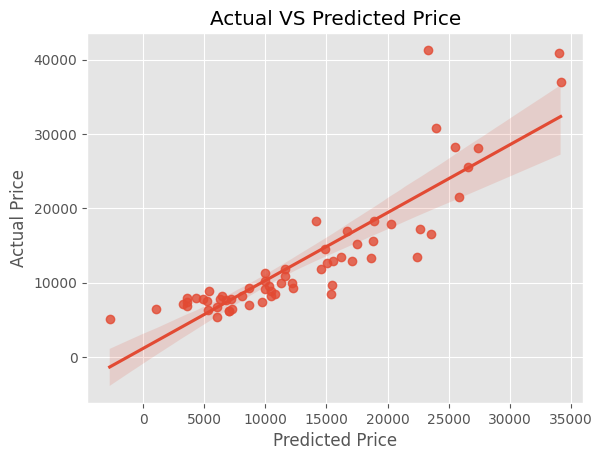

In [18]:
sns.regplot(x=pred,y=y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual VS Predicted Price')
plt.show()